# 4. SUPPORTED FINDINGS:

     Research shows that the intensity and risk of wildfires are closely affected by a lot of external factors such environmental changes, human activities, shifting meteorological patterns and vegetation surrounding the area. Environmental factors include temperature, soil moisture, wind speed, precipitation, evaporation rate and they together they play a key role in impacting the occurrences of wildfires.  

## Analysis and Interpretations:

    The climate data was first collected by web scrapping for the years 2010 to 2021 and forest fires data was downloaded from Kaggle which included data from 2013-20221. Hence, after cleaning, transforming our modified and merged dataset had data from the year 2013 to the year 2021. Although we had variables related to many factors, we appealed to focus our analysis on temperature and wind speed while considering the relationship between weather conditions and the number of forest fires of a region. 



In [29]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install notebook-as-pdf

In [31]:

import pandas as pd
import glob
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

%matplotlib inline

#Links to datasets
url_incidents = "https://github.com/NissyM/CrowdDoing/raw/main/California_Fire_Incidents.csv"
path="https://github.com/NissyM/CrowdDoing/raw/main/"

list_files = []
#file_list = glob.glob(path + "/*.csv")
df_incidents = pd.read_csv(url_incidents)

for i in glob.glob("climate_data_*"):
    list_files.append(pd.read_csv(i))
    
csv_merged = pd.concat(list_files, ignore_index=True)
csv_merged.to_csv('ClimateData.csv', index=False)
#print(csv_merged.tail())

# change the datatype of date field to Date
csv_merged['Date'] = pd.to_datetime(csv_merged['Date'])
#print("Output:")
#print(result)

#Append the data and create a climate dataset with averaged values grouped by Counties
averaged_csv=csv_merged.groupby(["County", csv_merged["Date"].dt.strftime('%Y')])['Temperature','Wind'].mean().reset_index()
#csv_merged.groupby(csv_merged['County','Date'].dt.strftime('%Y'))['Temperature'].mean().sort_values()
print(averaged_csv.head(12))

     County  Date  Temperature      Wind
0   Alameda  2010    57.417500  8.201667
1   Alameda  2011    56.102500  7.955000
2   Alameda  2012    56.213333  8.184167
3   Alameda  2013    57.472500  7.385833
4   Alameda  2014    59.467500  7.701667
5   Alameda  2015    58.701667  7.813333
6   Alameda  2016    59.285833  8.574167
7   Alameda  2017    58.773333  8.485000
8   Alameda  2018    56.989167  8.227500
9   Alameda  2019    58.995000  8.640833
10  Alameda  2020    60.416667  7.712500
11  Alameda  2021    58.005833  8.777500


In [32]:
df2 = df_incidents.rename(columns={'Counties': 'County','ArchiveYear': 'Date'})

# datatype changed back to int so as to match with the Forestfires dataset
averaged_csv['Date']=averaged_csv['Date'].astype(int)

# Merge both datasets and select required columns using outer join on Year and County
df3 = pd.merge(averaged_csv, df2[['AcresBurned','AdminUnit','Date','County','Name','Started']], on=['County','Date'], how='outer')

# Drop rows with missing columns after join that are missing for columns from Forestfires dataset
rslt_df= df3[df3['Date'] > 2012].dropna()

#Include a calculated column of count of occurences of forest fires in each county 
rslt_df['count'] = rslt_df.groupby('County')['County'].transform('count')

#len(rslt_df['County'].unique())  ==> 54 counties

In [33]:
rslt_df.head(32)

,County,Date,Temperature,Wind,AcresBurned,AdminUnit,Name,Started,count
3,Alameda,2013,57.472500,7.385833,240.0,CAL FIRE Santa Clara Unit,Vasco Fire,2013-06-08T10:16:00Z,32
4,Alameda,2013,57.472500,7.385833,150.0,CAL FIRE Santa Clara Unit,Highland Fire,2013-10-04T07:35:00Z,32
5,Alameda,2013,57.472500,7.385833,50.0,CAL FIRE Santa Clara Unit,Grant Fire,2013-07-04T10:00:00Z,32
6,Alameda,2013,57.472500,7.385833,38.0,CAL FIRE Santa Clara Unit / Alameda County Fire,Fallon Fire,2013-07-06T13:09:00Z,32
8,Alameda,2015,58.701667,7.813333,2700.0,CAL FIRE Santa Clara Unit,Tesla Fire,2015-08-19T14:45:00Z,32
9,Alameda,2015,58.701667,7.813333,300.0,CAL FIRE Santa Clara Unit,Site Fire,2015-06-05T20:22:00Z,32
10,Alameda,2015,58.701667,7.813333,242.0,CAL FIRE Santa Clara Unit,Christensen Fire,2015-05-28T17:00:00Z,32
11,Alameda,2015,58.701667,7.813333,53.0,CAL FIRE Santa Clara Unit,Tesla Fire,2015-06-25T16:10:00Z,32
12,Alameda,2015,58.701667,7.813333,45.0,CAL FIRE Santa Clara Unit,Geary Fire,2015-07-02T04:40:00Z,32
13,Alameda,2016,59.285833,8.574167,211.0,CAL FIRE Santa Clara Unit,Grant Fire,2016-06-25T16:11:00Z,32


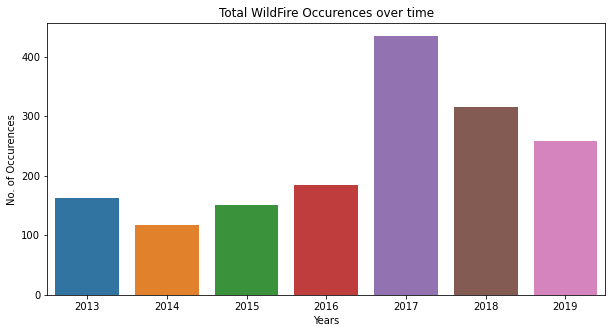

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(rslt_df['Date'])
plt.title('Total WildFire Occurences over time')
plt.xlabel('Years')
plt.ylabel('No. of Occurences')
plt.show()

### On studying about the frequency of forest fires from our collected data, it is evident that the year of 2017 saw the maximum number of forest fire occurrences which was over 400. The year of 2014 had the least occurrences which was just above 100, followed by the consecutive year of 2015. The graph below shows that the frequency has only grown over the years and each time the count has remained above 100.

In [35]:
fig=px.histogram(rslt_df, x='Date',color="County", barmode='group',labels={"Date": "Years", "count": "Occurences of ForestFires"}
    ).update_layout(
    title={"text": "County wise Occurences of Forest Fires each year", "x": 0.5}, yaxis_title="Occurences")
fig.show()

    Further, we grouped the data to understand the Counties with the highest three and lowest two occurrences of forest fires in the year 2017. This visual helped us to narrow down our analysis to focus on those counties and thereby be able to study the pattern of temperature and wind speed in those regions. 

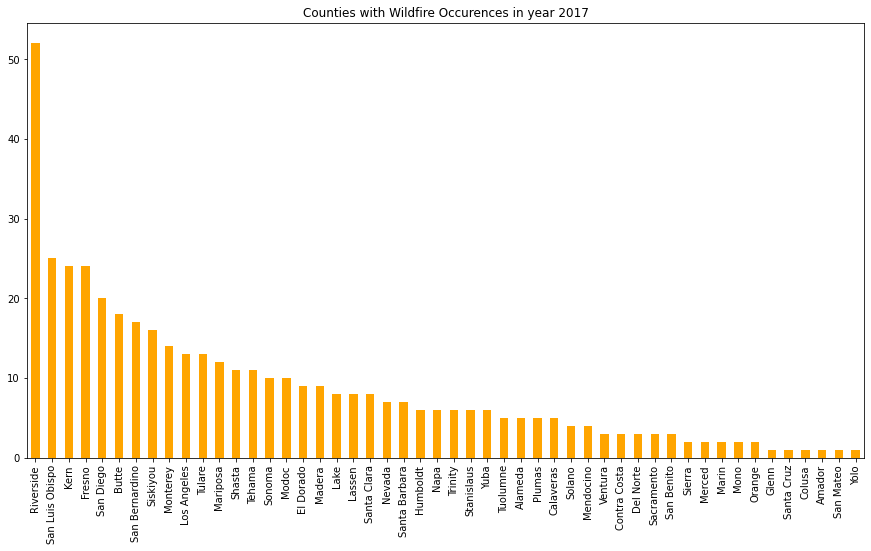

In [36]:
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
#matplotlib.style.use('fivethirtyeight')
#df[df['date'] == 6]['location'].value_counts()
top_10 = rslt_df[rslt_df['Date'] == 2017]['County'].value_counts()[:50]
#print(top_10.head(10))
#print(top_10.tail(10))
top_10.plot(kind='bar',figsize=(15,8),color="orange")
plt.title('Counties with Wildfire Occurences in year 2017')

plt.show()

In [37]:
test_df=rslt_df[rslt_df['County'].isin(['Riverside','Kern','San Luis Obispo','Yolo','San Mateo'])]
#print(test_df.head(10))
dftest = test_df.groupby(['County','Date']).agg({'Temperature': 'mean', 'Wind': 'mean'}).reset_index()
print(dftest.head(10))
px.line(data_frame = dftest, x = 'Date', y = 'Temperature',color = 'County',labels={"Date": "Years", "Temperature": "Temperature (°F)"},title='Temperature Trend over the years')

      County  Date  Temperature      Wind
0       Kern  2013    66.234167  5.070833
1       Kern  2014    69.155000  5.774167
2       Kern  2015    67.640000  5.448333
3       Kern  2016    67.874167  5.655833
4       Kern  2017    68.211667  5.656667
5       Kern  2018    67.911667  5.557500
6       Kern  2019    66.709167  5.975000
7  Riverside  2013    68.743333  5.187500
8  Riverside  2014    69.904167  5.409167
9  Riverside  2015    69.921667  5.648333


    Although the magnitude of the projected temperature rises and wind speed changes are still uncertain, modelling based on mean figures show that ecological, economic, and social disruptions are likely.

In [38]:
px.line(data_frame = dftest, x = 'Date', y = 'Wind',color = 'County',labels={"Date": "Years", "Wind": "Wind Speed (°F)"},title='Wind Speed Trend over the years')

# Climate Change and Weather:
    
    Here it is also very vital to understand an important distinction between the weather and the climate change. climate and weather are different concepts. The climate determines the general nature of the annual cycle of meteorological conditions, including the total duration of the fire hazardous period. The weather determines meteorological conditions in a fairly short period of time from several days to 2-3 weeks. Climate change is a long-term process accompanied by fluctuations in weather conditions. 


In [39]:
import plotly.express as px
Rs_df = rslt_df[(rslt_df['Date'] == 2017) & rslt_df['County'].isin(['Riverside','Kern','San Luis Obispo','Yolo','San Mateo'])]
df1 = Rs_df.groupby("County").agg({'Temperature': 'mean', 
                                     'Wind': 'mean'}).reset_index()
#test=Rs_df.groupby("County")['County'].value_counts()['Temperature','Wind','Precipitation','AcresBurned'].mean().reset_index()
print(df1)
fig = px.bar(df1,x="County", y="Temperature", title="Temperature in the Top and Low WildFire Occurence County in 2017",color='County');
fig.show()
wind_fig=px.bar(df1,x="County", y="Wind", title="Wind Speed in the Top  and Low WildFire Occurence County in 2017",color='County');
wind_fig.show()
#test.plot.bar(x="County", y="['County'].value_counts()", rot=70, title="AcresBurned in the Top 3 WildFire Occurence County in 2017");

            County  Temperature       Wind
0             Kern    68.211667   5.656667
1        Riverside    65.367500   3.702500
2  San Luis Obispo    60.450833   6.520000
3        San Mateo    58.735000  10.503333
4             Yolo    61.796667   7.917500


# Correlation :

### In the below visual, the relationship between weather conditions and the number of forest fires corresponds to low values of the correlation coefficients (Pearson’s coefficient). The occurrence of forest fires depends not only on the factors that contribute to them, but also on the factors that counteract them. Here it can be seen that the Pearson correlation for temperature and the count of forest fires is a positive value but very low. Hence, this case of wildfire occurrences cannot be totally caused by the changes in temperature of other environmental factors as per our data. Thereby, it draws our attention to an external factor of human involvement as a causation factor.

                 Date  Temperature      Wind  AcresBurned     count
Date         1.000000    -0.136495  0.093707     0.022075  0.028140
Temperature -0.136495     1.000000 -0.113183    -0.038703  0.333089
Wind         0.093707    -0.113183  1.000000    -0.016749 -0.435204
AcresBurned  0.022075    -0.038703 -0.016749     1.000000 -0.073117
count        0.028140     0.333089 -0.435204    -0.073117  1.000000


<AxesSubplot:>

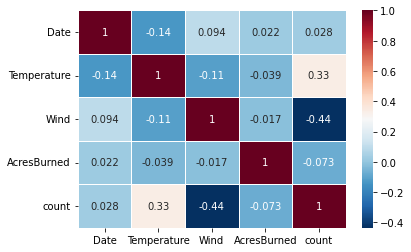

In [40]:
import numpy as np


pearsoncorr = rslt_df.corr(method='pearson')
print(pearsoncorr)

sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)


### Hence, from our statistical analysis, we are able understand in the case of forest fires of 2017, compared to the geographical factors, human activities are the main ignition cause of forest fires. In addition, human activities are those, which mostly shape the environment, influencing the state of vegetation and of the terrain sustaining the forest. Deforestation usually increases overland runoff, resulting in more erosion of the land surface and concurrently reducing the amount of water that soaks into the ground to recharge underlying aquifers. Degradation of the water table affects the moisture content of vegetation and makes it more vulnerable to ignition. A lot of careless humans involved, or initiated activities caused the maximum occurrences of these wildfires. This can be reinstated from a lot of journal articles and newspaper headline of the year 2017.

# Additional Analysis :

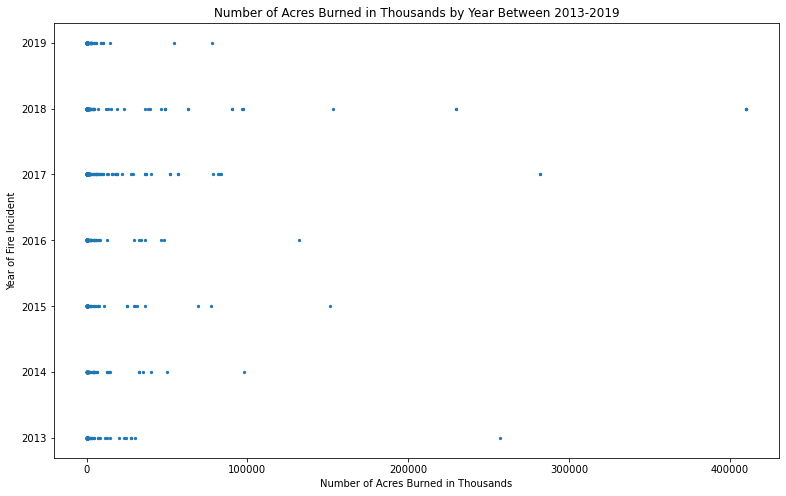

In [41]:
rslt_df.plot(kind='scatter', x='AcresBurned', y='Date', figsize=(13,8), s=5)

plt.xlabel('Number of Acres Burned in Thousands')
plt.ylabel('Year of Fire Incident')
plt.title('Number of Acres Burned in Thousands by Year Between 2013-2019');

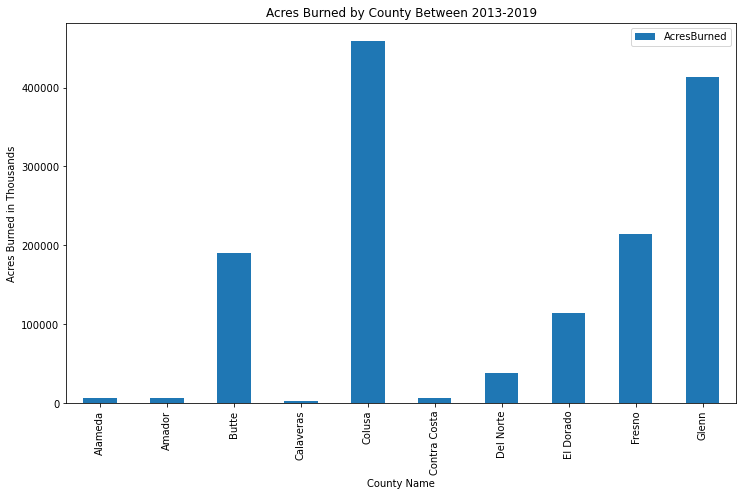

In [42]:
rslt_df[['County', 'AcresBurned']].groupby('County').sum().head(10).plot(kind='bar', figsize=(12,7)) 

plt.xlabel('County Name')
plt.ylabel('Acres Burned in Thousands')
plt.title('Acres Burned by County Between 2013-2019');